# Aggregation and disaggregation of rasters

- aggregate: decrease resolution
- disaggregate: increase resolution
- aggregation for reduction of computer processing and storage
- disaggregation for adding detail or matching other datasets

In [9]:
from helpers import src_dem
import rasterio
import rasterio.plot

## Aggreggation

In [2]:
src_dem.read(1).shape

(117, 117)

In [3]:
src_dem.transform

Affine(30.849999999999604, 0.0, 794599.1076146346,
       0.0, -30.84999999999363, 8935384.324602526)

>For aggregation, can specify `out_shape`
>
>Example, downscaling by a factor of 5
>
>Step 1

In [5]:
factor = 0.2
r = src_dem.read(1, 
                out_shape=(
                    int(src_dem.height * factor), 
                    int(src_dem.width * factor)
                ),
                resampling=rasterio.enums.Resampling.average
                )
r.shape

(23, 23)

>Step 2

In [8]:
new_transform = (src_dem.transform * 
                 src_dem.transform.scale(
                     (src_dem.width / r.shape[1]), 
                     (src_dem.height / r.shape[0])
                 ))
new_transform

Affine(156.93260869565017, 0.0, 794599.1076146346,
       0.0, -156.9326086956198, 8935384.324602526)

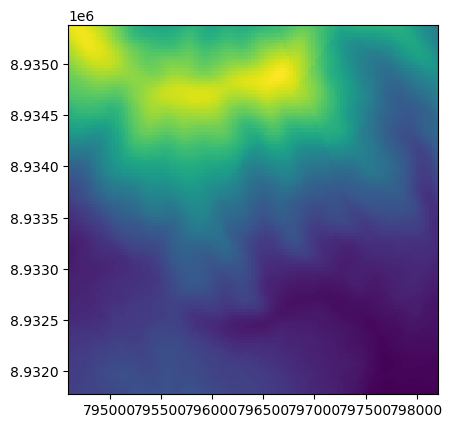

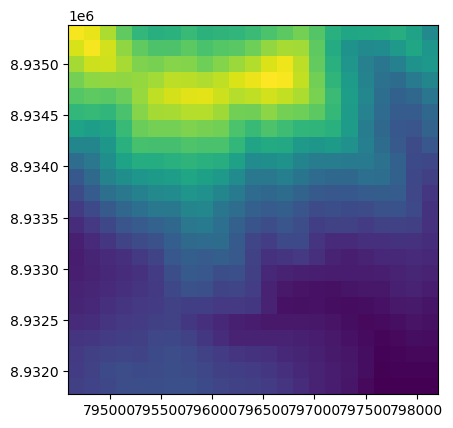

In [11]:
rasterio.plot.show(src_dem);
rasterio.plot.show(r, transform=new_transform);

>Exporting a raster with modified dimensions and transformation matrix

In [12]:
dst_kwargs = src_dem.meta.copy()

In [13]:
dst_kwargs

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 117,
 'height': 117,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 17S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32717"]]'),
 'transform': Affine(30.849999999999604, 0.0, 794599.1076146346,
        0.0, -30.84999999999363, 8935384.324602526)}

In [14]:
dst_kwargs.update({
    'transform': new_transform, 
    'width': r.shape[1], 
    'height': r.shape[0]
})
dst_kwargs

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 23,
 'height': 23,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 17S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32717"]]'),
 'transform': Affine(156.93260869565017, 0.0, 794599.1076146346,
        0.0, -156.9326086956198, 8935384.324602526)}

In [16]:
dst = rasterio.open('../output/dem_agg5.tif', 'w', **dst_kwargs)
dst.write(r, 1)
dst.close()

## Disaggregation

- Nearest neighbor for categorical rasters
- Bilinear for continuous variables

In [17]:
factor = 5 
r2 = src_dem.read(1, 
                 out_shape=(
                     int(src_dem.height * factor), 
                     int(src_dem.width * factor)
                 ), 
                 resampling=rasterio.enums.Resampling.bilinear)
r2.shape

(585, 585)

In [18]:
new_transform2 = (src_dem.transform *
                  src_dem.transform.scale(
                      (src_dem.width / r2.shape[1]), 
                      (src_dem.height / r2.shape[0])
                  )
                 )
new_transform2

Affine(6.169999999999921, 0.0, 794599.1076146346,
       0.0, -6.169999999998726, 8935384.324602526)

>Visualize a portion

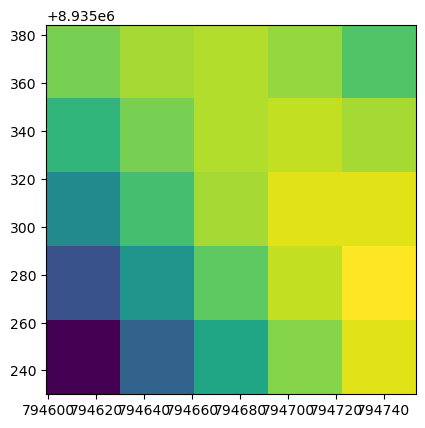

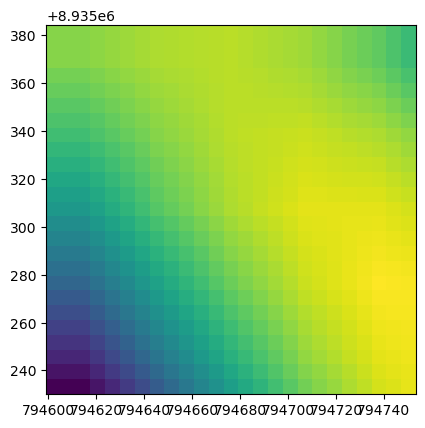

In [20]:
rasterio.plot.show(src_dem.read(1)[:5, :5], transform=src_dem.transform);
rasterio.plot.show(r2[:25, :25], transform=new_transform2);